Pokemon stats adventure.

Dataset is from Kaggle.

David Voller

特にポケモンそこまで好きじゃないですが、データが多いので面白そうです。

In [4]:
#インポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#データを読み込む
df = pd.read_csv("Pokemon.csv")
df.head(15) #最初の15を表す

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


タイプとか、色々入っています。面白そうですね。
よく見たら、Megaのポケモンの名前がおかしいです。。Megaの前のテキストを消します。

In [6]:
df.Name = df.Name.str.replace(".*(?=Mega)", "")
df.head(10)

/var/folders/n_/75qyxpt938q4jrl5dysv_prw0000gn/T/ipykernel_1999/4216803514.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.Name = df.Name.str.replace(".*(?=Mega)", "")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


名前が治りましたが、左側の二つの列は必要ないと思いますので、indexをNameに、そして#の列を消します。

In [9]:
df = df.set_index('Name')
df = df.drop(['#'],axis=1)
df.head(3)

KeyError: "None of ['Name'] are in the columns"

Type2はNanの場合、Type1と一緒にする

In [11]:
df['Type 2'].fillna(df['Type 1'], inplace=True)
df.head(10)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


どのTypeが一番多いのが気になります。

In [16]:
print(df["Type 1"].value_counts())
print(df["Type 2"].value_counts())

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64
Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: Type 2, dtype: int64


Type 1の一番多いのは Water で　Type 2は Flying

Totalで何のポケモンが一番強いかを確認
まず、df全体をTotalでソート
そして、上から名Typeの最初に出たポケモンはそのTypeの一番強いです

In [17]:
strongest = df.sort_values(by='Total', ascending=False) #sorting the rows in descending order
strongest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
KyogrePrimal Kyogre,Water,Water,770,100,150,90,180,160,90,3,True
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Arceus,Normal,Normal,720,120,120,120,120,120,120,4,True
Mega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
Mega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True


Mega RayquazaとMega Mewtwo Yが最も強いポケモンですね。
逆に、一番弱いのは？

In [18]:
weakest = df.sort_values(by='Total') #sorting the rows in ascending order
weakest.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Sunkern,Grass,Grass,180,30,30,30,30,30,30,2,False
Azurill,Normal,Fairy,190,50,20,40,20,40,20,3,False
Kricketot,Bug,Bug,194,37,25,41,25,41,25,4,False
Ralts,Psychic,Fairy,198,28,25,25,45,35,40,3,False
Magikarp,Water,Water,200,20,10,55,15,20,80,1,False
Pichu,Electric,Electric,205,20,40,15,35,35,60,2,False
Tyrogue,Fighting,Fighting,210,35,35,35,35,35,35,2,False
Cleffa,Fairy,Fairy,218,50,25,28,45,55,15,2,False
Poochyena,Dark,Dark,220,35,55,35,30,30,35,3,False


SunkernはTotal180で一番弱いポケモンです。

強さなら、TotalじゃなくてAttack?

In [20]:
power = df.sort_values(by='Attack', ascending=False)
power.drop_duplicates(subset=['Type 1'],keep='first')

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
Mega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Banette,Ghost,Ghost,555,64,165,75,93,83,75,3,False
Rampardos,Rock,Rock,495,97,165,60,65,50,58,4,False
Slaking,Normal,Normal,670,150,160,100,95,65,100,3,False
Mega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
Mega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


Mega Mewtwoがまた出ましたが、今回は　X

In [21]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


_________________________________________________________

## 視覚化

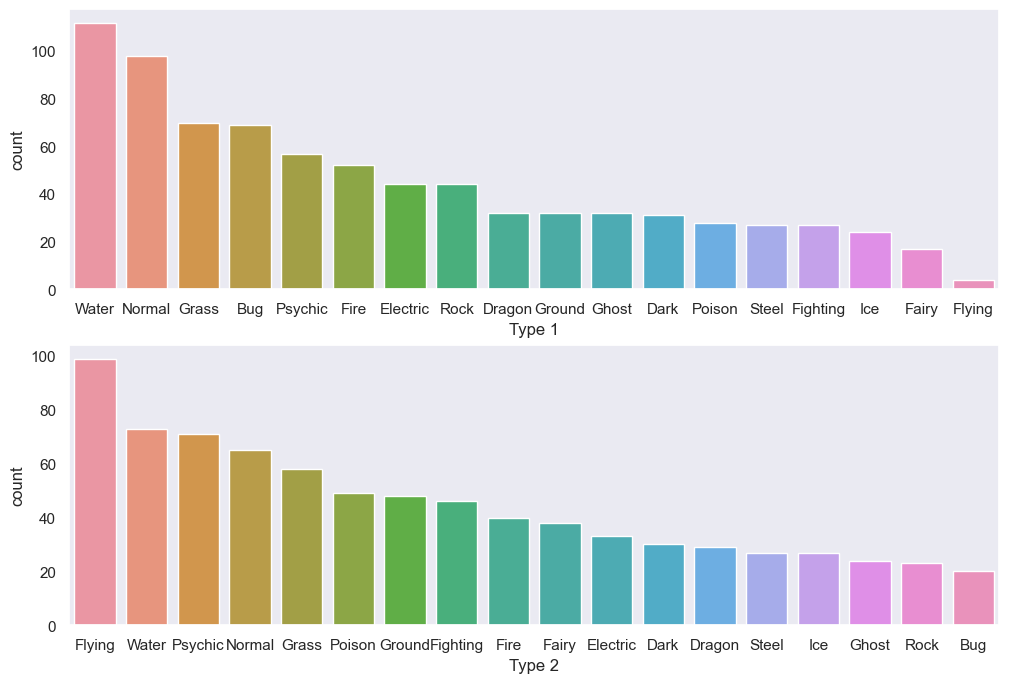

In [36]:
sns.set(style = 'dark')
f, ax = plt.subplots(2,1, figsize = (12,8)) #making 2 count plots 

sns.countplot(x = 'Type 1', data = df, order = df['Type 1'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'Type 2', data = df, order = df['Type 2'].value_counts().index ,ax = ax[1])

plt.show()

Type別のトータルが知りたいです。しかし、上にType 2のNanをType 1をType 2にコピーしました。


In [40]:
#we create a dictionary to make process easier
types_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0, 'Flying' : 0}

type1 = df["Type 1"]
type2 = df["Type 2"]

for i in range(len(type1)):
    
    #first, count the Type 1 column
    types_count[type1[i]] += 1
    
    #now we count the Type 2 column and avoid double counting
    if type1[i] != type2[i]:
        types_count[type2[i]] += 1

for t in types_count:
    print("{:10} = {}".format(t,types_count[t]))

Grass      = 95
Fire       = 64
Water      = 126
Bug        = 72
Normal     = 102
Poison     = 62
Electric   = 50
Ground     = 67
Fairy      = 40
Fighting   = 53
Psychic    = 90
Rock       = 58
Ghost      = 46
Ice        = 38
Dragon     = 50
Dark       = 51
Steel      = 49
Flying     = 101


In [15]:
type1_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}
type2_count = {'Grass' : 0, 'Fire' : 0, 'Water' : 0, 'Bug' : 0, 'Normal' : 0, 'Poison' : 0, 
               'Electric' : 0, 'Ground' : 0, 'Fairy' : 0, 'Fighting' : 0, 'Psychic' : 0, 
               'Rock' : 0, 'Ghost' : 0, 'Ice' : 0, 'Dragon' : 0, 'Dark' : 0, 'Steel' : 0,
               'Flying' : 0}

for i in range(len(type1)):
    type1_count[type1[i]] += 1
    type2_count[type2[i]] += 1

print("TYPE 1")
for t in type1_count:
    print("{:10} = {}".format(t,type1_count[t]))
print("-------------------")
print("TYPE 2")
for t in type2_count:
    print("{:10} = {}".format(t,type2_count[t]))

TYPE 1
Grass      = 70
Fire       = 52
Water      = 112
Bug        = 69
Normal     = 98
Poison     = 28
Electric   = 44
Ground     = 32
Fairy      = 17
Fighting   = 27
Psychic    = 57
Rock       = 44
Ghost      = 32
Ice        = 24
Dragon     = 32
Dark       = 31
Steel      = 27
Flying     = 4
-------------------
TYPE 2
Grass      = 58
Fire       = 40
Water      = 73
Bug        = 20
Normal     = 65
Poison     = 49
Electric   = 33
Ground     = 48
Fairy      = 38
Fighting   = 46
Psychic    = 71
Rock       = 23
Ghost      = 24
Ice        = 27
Dragon     = 29
Dark       = 30
Steel      = 27
Flying     = 99


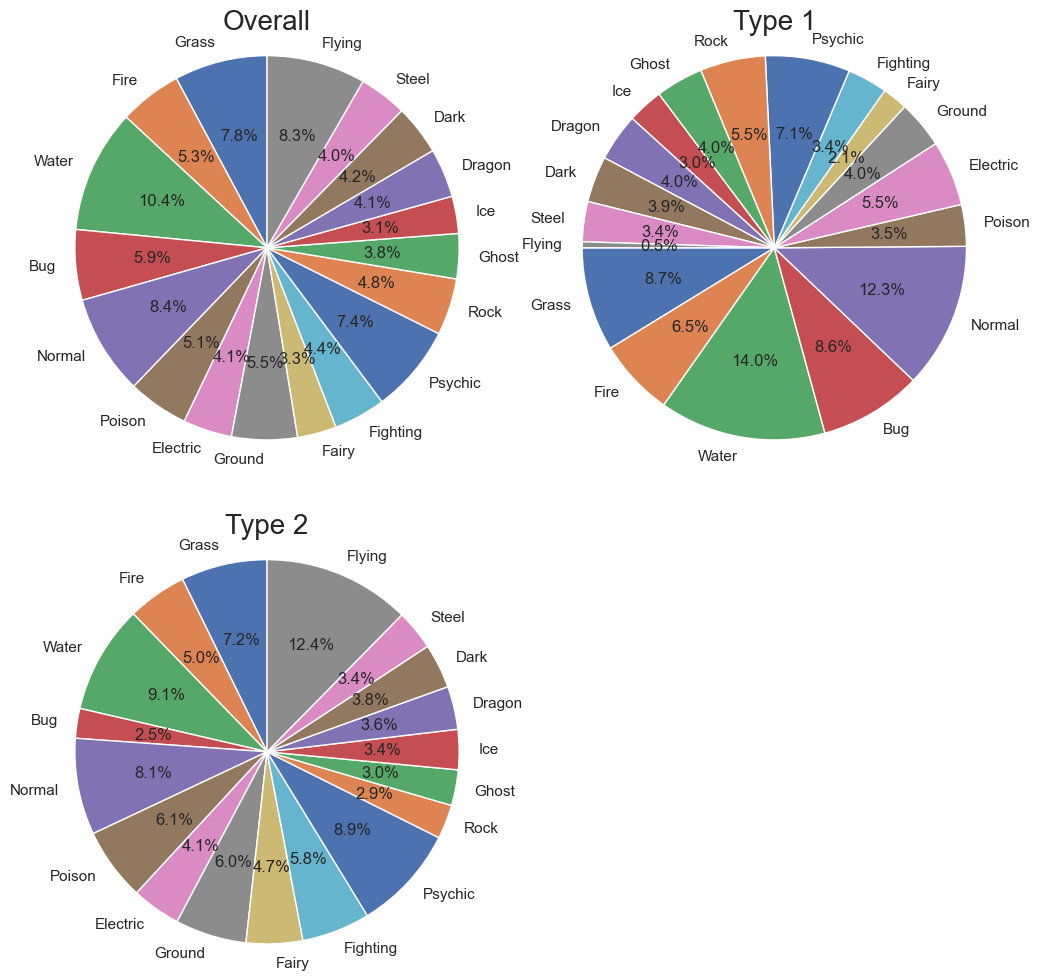

In [45]:
f, axs = plt.subplots(2,2, figsize=(12,12))

labels ='Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric', 'Ground', \
        'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost' ,'Ice' ,'Dragon' ,'Dark' , \
        'Steel','Flying'
    
size0 = [95,64,126,72,102,62,50,67,40,53,90,58,46,38,50,51,49,101] #overall count
size1 = [70,52,112,69,98,28,44,32,17,27,57,44,32,24,32,31,27,4] #Type 1 count
size2 = [58,40,73,20,65,49,33,48,38,46,71,23,24,27,29,30,27,99] #Type 2 count

axs[0,0].pie(size0, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[0,0].axis("equal")
axs[0,0].set_title("Overall", size = 20)

axs[0,1].pie(size1, labels = labels, autopct='%1.1f%%' ,startangle = 180)
axs[0,1].axis("equal")
axs[0,1].set_title("Type 1", size = 20)

axs[1,0].pie(size2, labels = labels, autopct='%1.1f%%' ,startangle = 90)
axs[1,0].axis("equal")
axs[1,0].set_title("Type 2", size = 20)

f.delaxes(axs[1,1])
plt.show()

世代比較

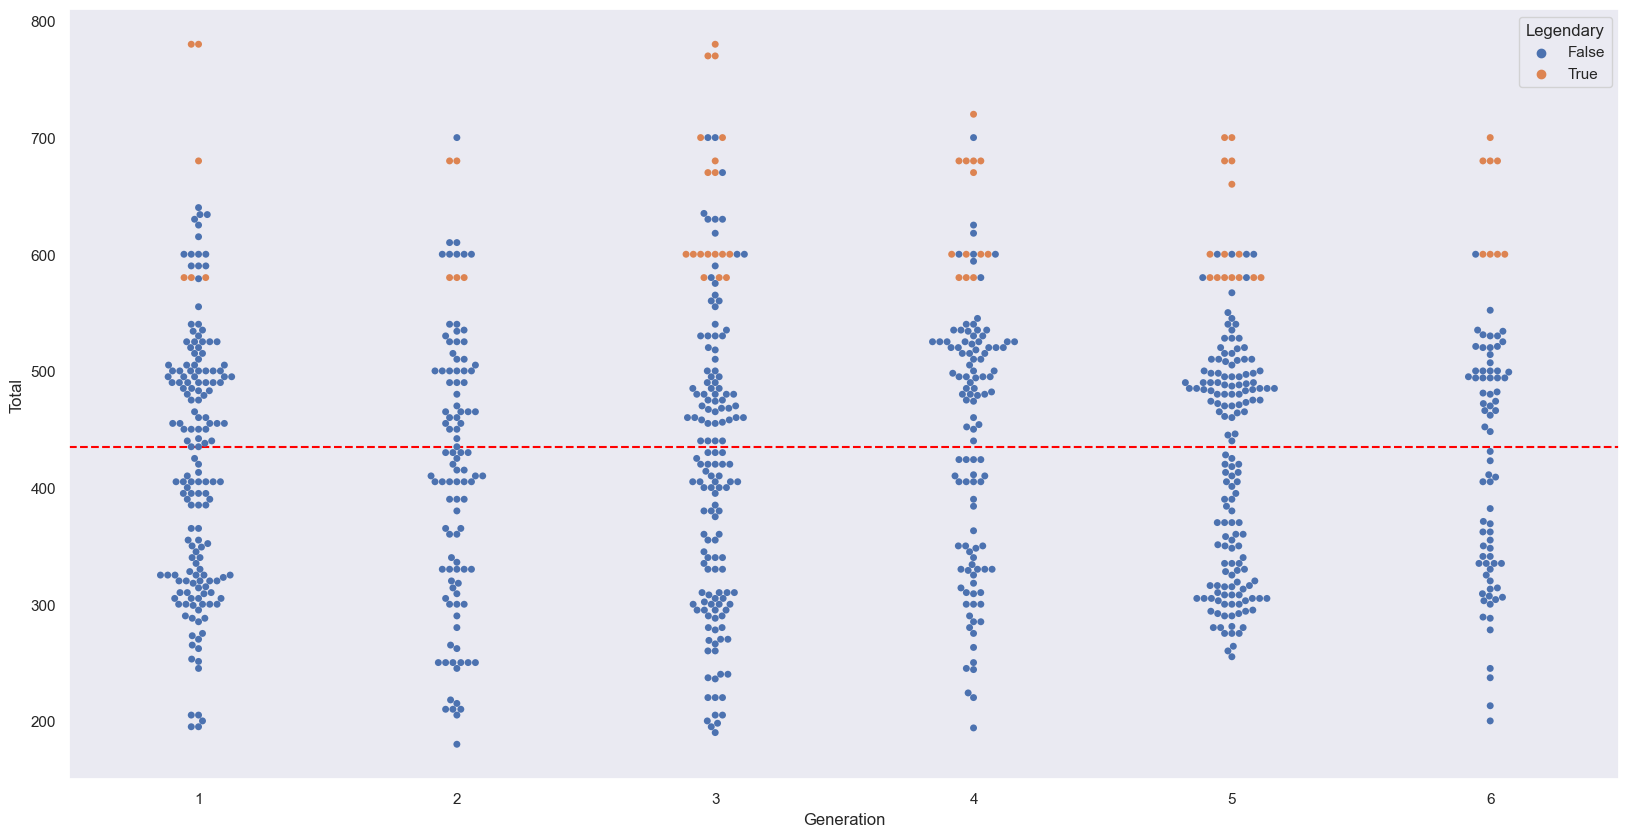

In [53]:
f, ax = plt.subplots(1,1, figsize = (20,10))
ax = sns.swarmplot(data = df, x = 'Generation', y= 'Total', hue = 'Legendary')

plt.axhline(df['Total'].mean(), color = 'red', linestyle = 'dashed') #giving a straight line on mean

plt.show()

第3世代が強いかな？

相関

/var/folders/n_/75qyxpt938q4jrl5dysv_prw0000gn/T/ipykernel_1999/225241997.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot = True, cmap = 'cool')


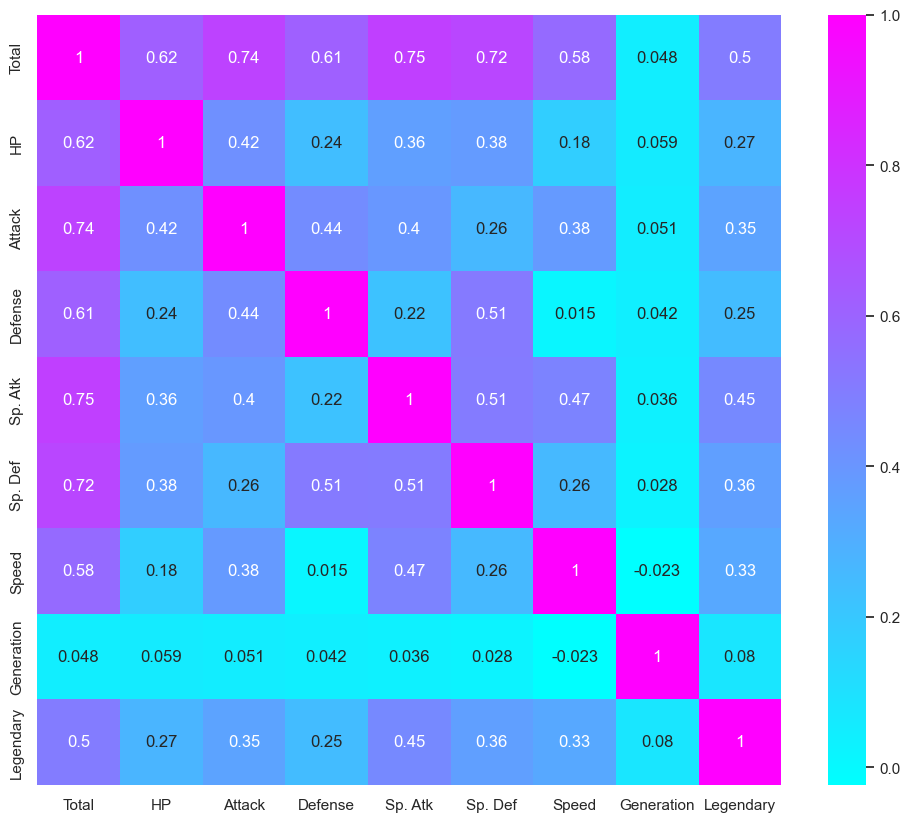

In [56]:
f, ax = plt.subplots(1,1,figsize=(12,10))
ax = sns.heatmap(df.corr(), annot = True, cmap = 'cool')

plt.show()

Total 意外の相関はなさそうです。。